# Decision Trees

Implement a Decision Tree algorithm.

##  Perform the following:
1. Implement two impurity measures: Gini and Entropy.
2. Implement a decision tree from scratch.
3. Prune the tree to achieve better results.
4. Visualize your results and the tree.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from DT import * # this imports all functions from DT.py

# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Make the notebook automatically reload external python modules
%load_ext autoreload
%autoreload 2

## Data preprocessing

We will use the breast cancer dataset that is available as a part of sklearn - a popular machine learning and data science library in python. In this example, our dataset will be a single matrix with the **labels on the last column**. Notice that you are not allowed to use additional functions from sklearn.

In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# load dataset
X, y = datasets.load_breast_cancer(return_X_y = True)
X = np.column_stack([X,y]) # the last column holds the labels

# split dataset
X_train, X_test = train_test_split(X, random_state=99)

print("Training dataset shape: ", X_train.shape)
print("Testing dataset shape: ", X_test.shape)

Training dataset shape:  (426, 31)
Testing dataset shape:  (143, 31)


## Impurity Measures

Implement the functions `calc_gini` and `calc_entropy` in the python file `DT.py`. Test the implementation:

In [5]:
ginix = calc_gini(X_train)
entx = calc_entropy(X_train)
giniy = calc_gini(y)
enty = calc_entropy(y)
print(ginix)
print(entx)
print(giniy)
print(enty)

0.47768299940488
0.9675594819018212
0.4675300607546925
0.9526351224018599


## Building a Decision Tree

Use a Python class to construct the decision tree (look at the `DecisionNode` class in the python file `DT.py`. The class support the following functionality:

1. Initiating a node for a decision tree. You will need to use several class methods and class attributes and you are free to use them as you see fit. We recommend that every node will hold the feature and value used for the split and its children.
2. The code support both Gini and Entropy as impurity measures. 
3. The provided data includes continuous data. Create at most a single split for each node of the tree. The threshold  use for this exercise are the average of each consecutive pair of values. For example, assume some features contains the following values: [1,2,3,4,5]. You should use the following thresholds [1.5, 2.5, 3.5, 4.5]. 
4. When constructing the tree, test all possible thresholds for each feature. The stopping criteria is a pure tree.

In [6]:
tree_gini = build_tree(data=X_train, impurity=calc_gini) 
tree_entropy = build_tree(data=X_train, impurity=calc_entropy)

## Tree evaluation

After building both trees using the training set (using Gini and Entropy as impurity measures), calculate the accuracy on the test set and print the measure that gave you the best test accuracy.

In [7]:
accent = calc_accuracy(tree_entropy, X_test)
accgini = calc_accuracy(tree_gini, X_test)
if accent > accgini:
    print("the best accuracy using entropy:",accent,"\b%")
else:
    print("the bes accuracy using gini:",accgini,"\b%")

the best accuracy using entropy: 93.7062937062937 %


## Chi square pre-pruning

Consider the following p-value cut-off values: [1 (no pruning), 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00001]. For each value, construct a tree and prune it according to the cut-off value. Next, calculate the training and testing accuracy. On a single plot, draw the training and testing accuracy as a function of the p-value.

In [8]:
training = []
testing  = []
roots = []
for chi_value in [1, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00001]:
    root = build_tree(X_train, calc_entropy, chi_value)
    roots.append(root)
    training.append(calc_accuracy(root, X_train))
    testing.append(calc_accuracy(root, X_test))
    pass

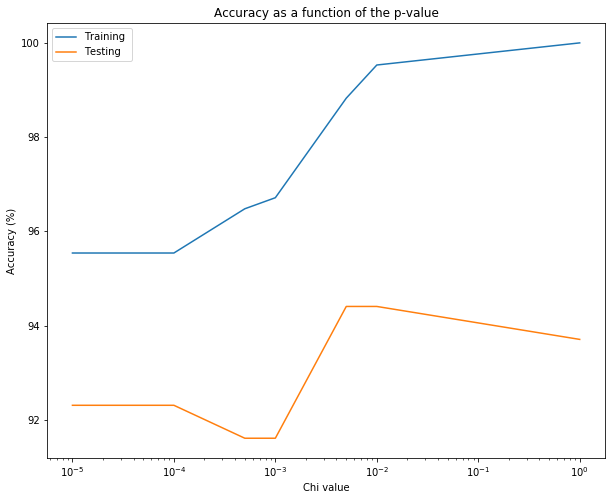

In [9]:
#### visualization ####
chi_table = [1, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00001]

plt.plot(chi_table, training)
plt.plot(chi_table, testing)
plt.xscale('log')
plt.yscale('linear')
plt.xlabel('Chi value')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy as a function of the p-value')
plt.legend(['Training ', 'Testing ']);
plt.show()

## Post pruning

Construct a decision tree without Chi square pruning. For each leaf in the tree, calculate the test accuracy of the tree assuming no split occurred on the parent of that leaf and find the best such parent (in the sense that not splitting on that parent results in the best testing accuracy among possible parents). Make that parent into a leaf and repeat this process until you are left with just the root. On a single plot, draw the training and testing accuracy as a function of the number of internal nodes in the tree.

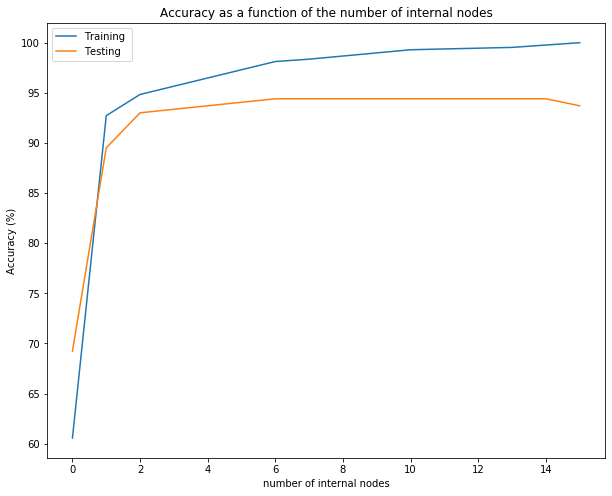

In [10]:
tree_root = build_tree(data=X_train, impurity=calc_entropy)
num_of_nodes, train_acc, test_acc = post_pruning(tree_root, X_train, X_test)
plt.plot(num_of_nodes, train_acc)
plt.plot(num_of_nodes, test_acc)
plt.xscale('linear')
plt.yscale('linear')
plt.xlabel('number of internal nodes')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy as a function of the number of internal nodes')
plt.legend(['Training ', 'Testing ']);
plt.show()


## Print the tree

Complete the function `print_tree` in the python file `DT.py` and print the tree using the chosen impurity measure and no pruning.

In [11]:
print_tree(tree_entropy)

[X27 <= 0.14235]
  [X13 <= 21.924999999999997]
    [X4 <= 0.079285]
      leaf: [{0.0: 140}]
      leaf: [{1.0: 1}]
    [X21 <= 29.0]
      leaf: [{0.0: 5}]
      [X1 <= 20.52]
        leaf: [{0.0: 1}]
        leaf: [{1.0: 8}]
  [X3 <= 696.25]
    [X1 <= 19.72]
      leaf: [{0.0: 13}]
      [X6 <= 0.073105]
        leaf: [{0.0: 3}]
        leaf: [{1.0: 7}]
    [X27 <= 0.1349]
      [X15 <= 0.02744]
        leaf: [{1.0: 6}]
        [X0 <= 13.225000000000001]
          leaf: [{0.0: 4}]
          leaf: [{1.0: 1}]
      [X10 <= 0.62555]
        [X1 <= 18.630000000000003]
          leaf: [{1.0: 2}]
          leaf: [{0.0: 1}]
        [X21 <= 33.349999999999994]
          [X21 <= 33.56]
            leaf: [{1.0: 17}]
            leaf: [{0.0: 1}]
          leaf: [{1.0: 216}]
